In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Nicer plotting
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import numpy as np

# FieldMesh Examples

In [2]:
from pmd_beamphysics import FieldMesh, tools

In [3]:
?FieldMesh

Init signature: FieldMesh(h5=None, data=None)
Docstring:     
Class for openPMD External Field Mesh data.

Initialized on on openPMD beamphysics particle group:
    h5 = open h5 handle, or str that is a file
    data = raw data
    
The required data is stored in ._data, and consists of dicts:
    'attrs'
    'components'

Component data is always 3D.

Initialization:
    From openPMD-beamphysics HDF5 file:
        FieldMesh('file.h5')
    From data dict:
        FieldMesh(data=data)

Derived properties:
            
    .r, .theta, .z
    .Br, .Btheta, .Bz
    .Er, .Etheta, .Ez
    .E, .B
    
    .phase
    .scale
    .factor
    
    .harmonic
    .frequency
    
    .shape
    .geometry
    .mins, .maxs, .deltas
    .meshgrid
    .dr, .dtheta, .dz

Booleans:
    .is_pure_electric
    .is_pure_magnetic
    .is_static

Units and labels
    .units
    .axis_labels

Plotting:
    .plot
    .plot_onaxis

Writers
    .write
    .write_astra_3d
    .write_impact_solrf
    .write_gpt
    .

In [4]:
FM = FieldMesh('../data/solenoid.h5')
FM

<FieldMesh with cylindrical geometry and (101, 1, 201) shape at 0x156106910>

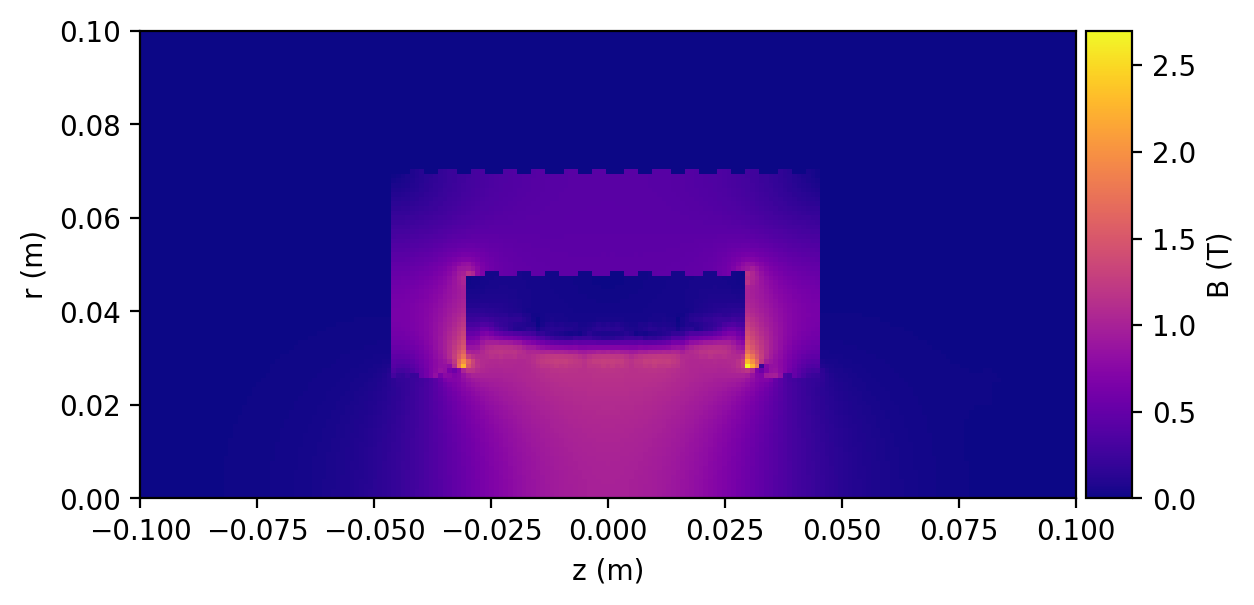

In [5]:
# Built-in plotting
FM.plot('B', aspect='equal')

# Internal data

In [6]:
# Internal data: attributes and components
FM.attrs, FM.components.keys()

({'eleAnchorPt': 'beginning',
  'gridGeometry': 'cylindrical',
  'axisLabels': array(['r', 'theta', 'z'], dtype='<U5'),
  'gridLowerBound': array([0, 1, 0]),
  'gridOriginOffset': array([ 0. ,  0. , -0.1]),
  'gridSpacing': array([0.001, 0.   , 0.001]),
  'gridSize': array([101,   1, 201]),
  'harmonic': 0,
  'fundamentalFrequency': 0,
  'RFphase': 0,
  'fieldScale': 1.0},
 dict_keys(['magneticField/z', 'magneticField/r']))

# Properties

In [7]:
# Convenient access to these
FM.shape

(101, 1, 201)

In [8]:
FM.frequency

0

In [9]:
# Coordinate vectors: .r, .theta, .z
FM.r, FM.dr

(array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
        0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
        0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
        0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
        0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
        0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
        0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
        0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
        0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
        0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
        0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
        0.099, 0.1  ]),
 0.001)

In [10]:
# Grid info
FM.mins, FM.maxs, FM.deltas

(array([ 0. ,  0. , -0.1]),
 array([0.1, 0. , 0.1]),
 array([0.001, 0.   , 0.001]))

In [11]:
# Convenient logicals
FM.is_static, FM.is_pure_magnetic, FM.is_pure_magnetic,  FM.is_pure_electric

(True, True, True, False)

# Components

In [12]:
FM.components

{'magneticField/z': array([[[ 4.10454985e-03,  4.31040451e-03,  4.52986744e-03, ...,
           4.67468517e-04,  3.93505841e-04,  3.31380794e-04]],
 
        [[ 4.10132316e-03,  4.30698128e-03,  4.52613784e-03, ...,
           4.63910019e-04,  3.90463457e-04,  3.28826095e-04]],
 
        [[ 4.09178241e-03,  4.29666227e-03,  4.51500745e-03, ...,
           4.53304832e-04,  3.81497195e-04,  3.21252672e-04]],
 
        ...,
 
        [[-8.55276742e-05, -9.25454620e-05, -9.97134392e-05, ...,
          -1.67910069e-13, -1.66617291e-13, -1.69112101e-13]],
 
        [[-8.66606075e-05, -9.34605759e-05, -1.00393739e-04, ...,
          -1.63746446e-13, -1.62385457e-13, -1.63975660e-13]],
 
        [[-8.76493773e-05, -9.42325632e-05, -1.00947206e-04, ...,
          -1.59165583e-13, -1.57653026e-13, -1.58633209e-13]]]),
 'magneticField/r': array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
 
        [[-9.96833640e-05, -1.

In [13]:
# Convenient access to component data
FM.Bz is FM['magneticField/z']

True

In [14]:
# Setting .scale will set the underlying attribute
FM.scale = 2
FM.attrs['fieldScale'], FM.scale

(2, 2)

In [15]:
# Raw components accessed by their full key
FM['magneticField/z']

# Scaled component accessed by shorter keys, e.g
FM['Bz']

FM['magneticField/z'].max(), FM['Bz'].max()

(2.150106838829148, 4.300213677658296)

# Oscillating fields

Oscillating fields have `.harmonic > 0`

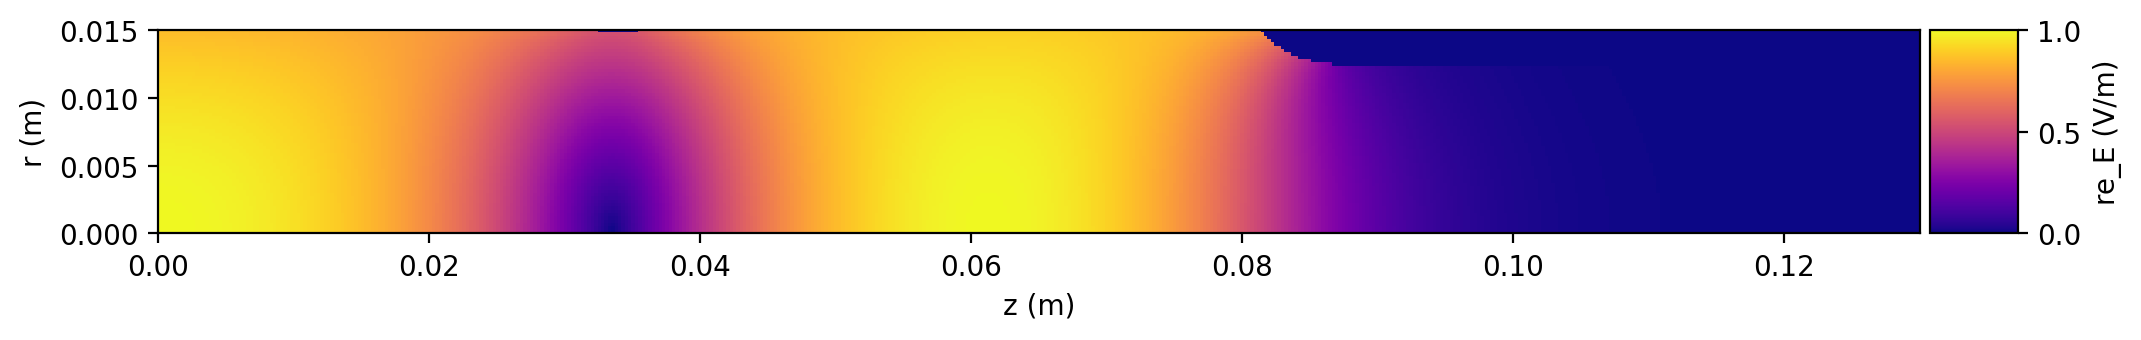

In [16]:
FM = FieldMesh('../data/rfgun.h5')
FM.plot('re_E', aspect='equal', figsize=(12,4))

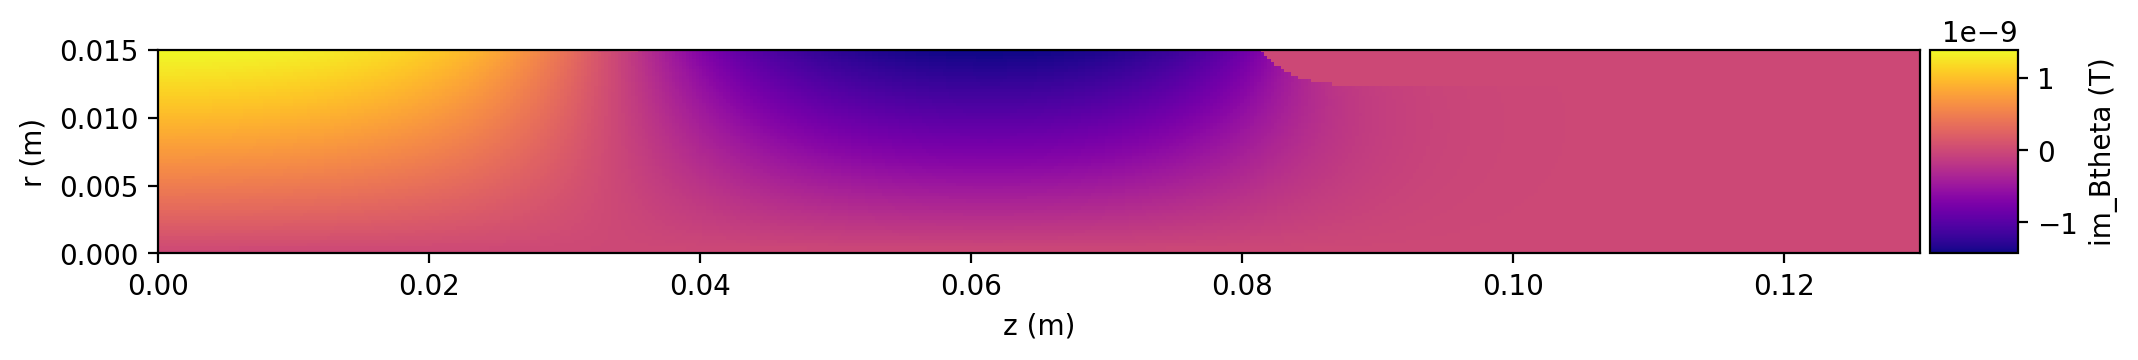

In [17]:
# The magnetic field is out of phase, so use the im_ syntax
FM.plot('im_Btheta', aspect='equal', figsize=(12,4))

In [18]:
# Max on-axis field
np.abs(FM.Ez[0,0,:]).max()

1.0

## Verify the oscillation

Complex fields oscillate as $e^{-i\omega t}$. For TM fields, the spatial components $E_z$ and $B_\theta$ near the axis 

$\Re E_{z} = -\frac{r}{2}\frac{\omega}{c^2} \Im B_\theta$


Text(0.5, 1.0, 'Complex field oscillation')

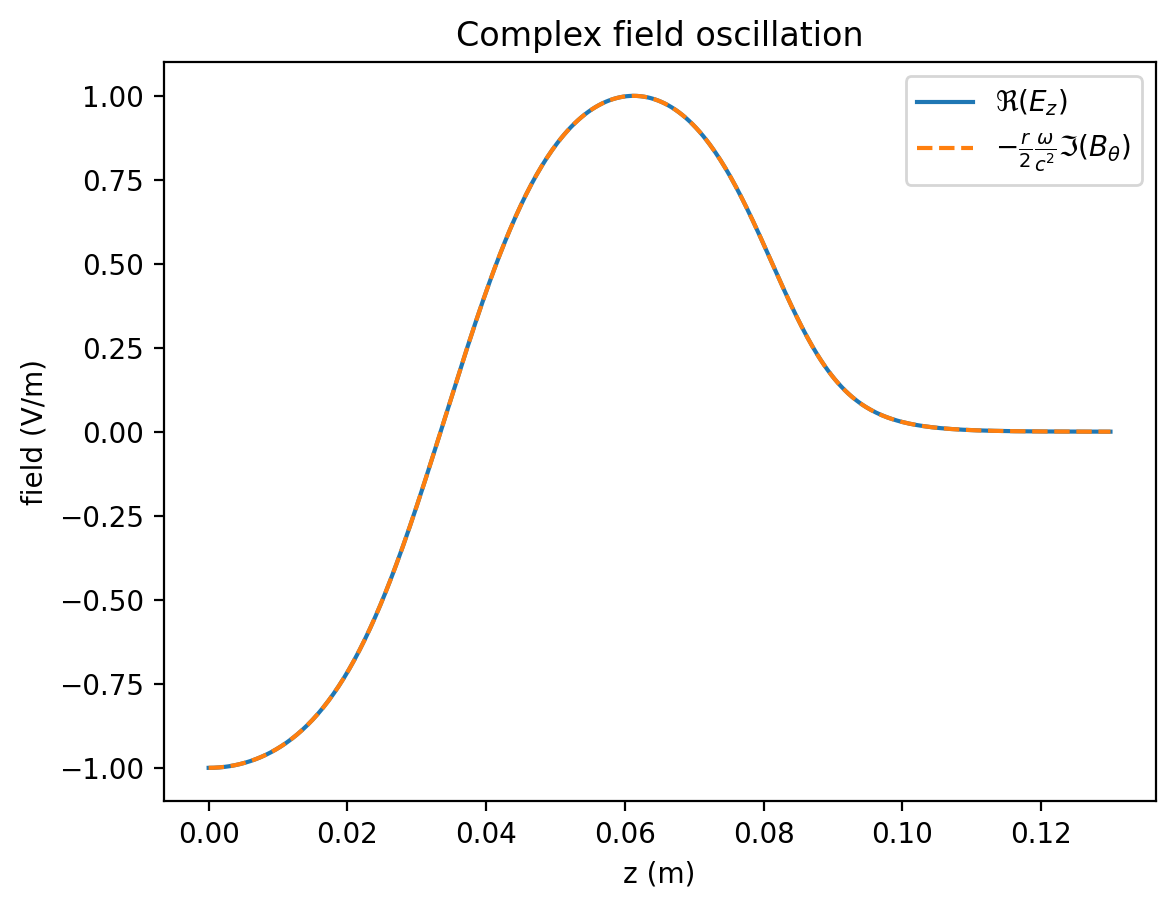

In [19]:
c_light = 299792458.

dr = FM.dr
omega = FM.frequency*2*np.pi

# Check the first off-axis grid points
z0 = FM.z
Ez0 = np.real(FM.Ez[0,0,:])
B1 = -np.imag(FM.Btheta[1,0,:])

plt.plot(z0, Ez0, label=r'$\Re \left( E_z\right)$')
plt.plot(z0, B1*2/dr *c_light**2/omega, '--', label=r'$-\frac{r}{2}\frac{\omega}{c^2} \Im\left(B_\theta\right)$')
plt.ylabel('field (V/m)')
plt.xlabel('z (m)')
plt.legend()
plt.title(r'Complex field oscillation')

# Units

In [20]:
FM.units('Bz')

pmd_unit('T', 1, (0, 1, -2, -1, 0, 0, 0))

In [21]:
# This also works
FM.units('abs_Ez')

pmd_unit('V/m', 1, (1, 1, -3, -1, 0, 0, 0))

# Write

In [22]:
# write openPMD
FM.write('rfgun2.h5')

In [23]:
# Read back. 
FM2 = FieldMesh('rfgun2.h5')

assert FM == FM2

## Write Impact-T 

Impact-T uses a particular Fourier representation for 1D fields. These routines form this data.

Here we will use `zmirror=True` to force the RF gun field to be periodic. 

In [24]:
?FM.write_impact_solrf

Signature:
FM.write_impact_solrf(
    filePath=None,
    *,
    zmirror=False,
    n_coef=None,
    err_calc=False,
)
Docstring:
Creates and optionally writes Impact-T rdfata-style data for the solrf element. 


Parameters
----------
filePath: str, optional
    File name to write the data to. Example: 'rfdata999'
    Default: None => does not write
    
zmirror: bool, optional
    Mirror the field about z=0. This is necessary for non-periodic field such as electron guns.
    Default: False

n_coef: int, optional
    Default: None => create the maximum number of coefficients
    
Returns
-------
dict with:
    rfdata: ndarray
    
    zmin: float
    
    zmax: float
    
    Ez_scale: float
    
    Bz_scale: float
    
    Ez_err: float, optional
    
    Bz_err: float, optional
    
File:      ~/Code/GitHub/openPMD-beamphysics/pmd_beamphysics/fields/fieldmesh.py
Type:      method


In [25]:
dat = FM.write_impact_solrf('rfdata99', n_coef = 30, err_calc=True, zmirror=True)
dat.keys()

dict_keys(['Ez_fcoefs', 'Ez_scale', 'Ez_err', 'Bz_fcoefs', 'Bz_scale', 'Bz_err', 'zmin', 'zmax', 'rfdata'])

In [26]:
# This what is written directly to file.
dat['rfdata']

array([ 5.90000000e+01, -1.30000000e-01,  1.30000000e-01,  2.60000000e-01,
        2.38794165e-01, -3.04717859e-01, -3.56926831e-17, -7.49524991e-01,
        7.32463833e-18, -2.59757413e-01, -4.86268193e-17,  1.27535902e-01,
       -7.69533405e-17,  4.49651550e-02, -1.49248909e-16,  4.67567146e-03,
       -1.74265243e-16,  3.32025307e-02,  6.08199268e-17, -2.74904837e-03,
        1.81697659e-16, -1.55710320e-02, -1.52414246e-16,  2.64475111e-03,
       -1.34254267e-16,  9.51814907e-04,  2.55576008e-16, -2.68547441e-03,
        4.07106499e-16,  1.50824509e-03,  3.51376926e-16,  7.16574075e-04,
        1.71392948e-16, -9.25573616e-04, -1.31642032e-16,  2.40084183e-04,
       -1.26211536e-16,  2.61495768e-04,  1.88301027e-16, -2.41687337e-04,
       -1.66678067e-17,  6.22859548e-05, -3.05911380e-16,  7.85163760e-05,
       -2.60061418e-16, -8.56926328e-05, -2.58448920e-16,  2.38418521e-06,
       -2.89297721e-16,  2.84696849e-05, -1.77699805e-16, -2.10693774e-05,
       -1.20356079e-17,  

In [27]:
# Recontruction error
dat['Ez_err']

7.685886302956986e-08

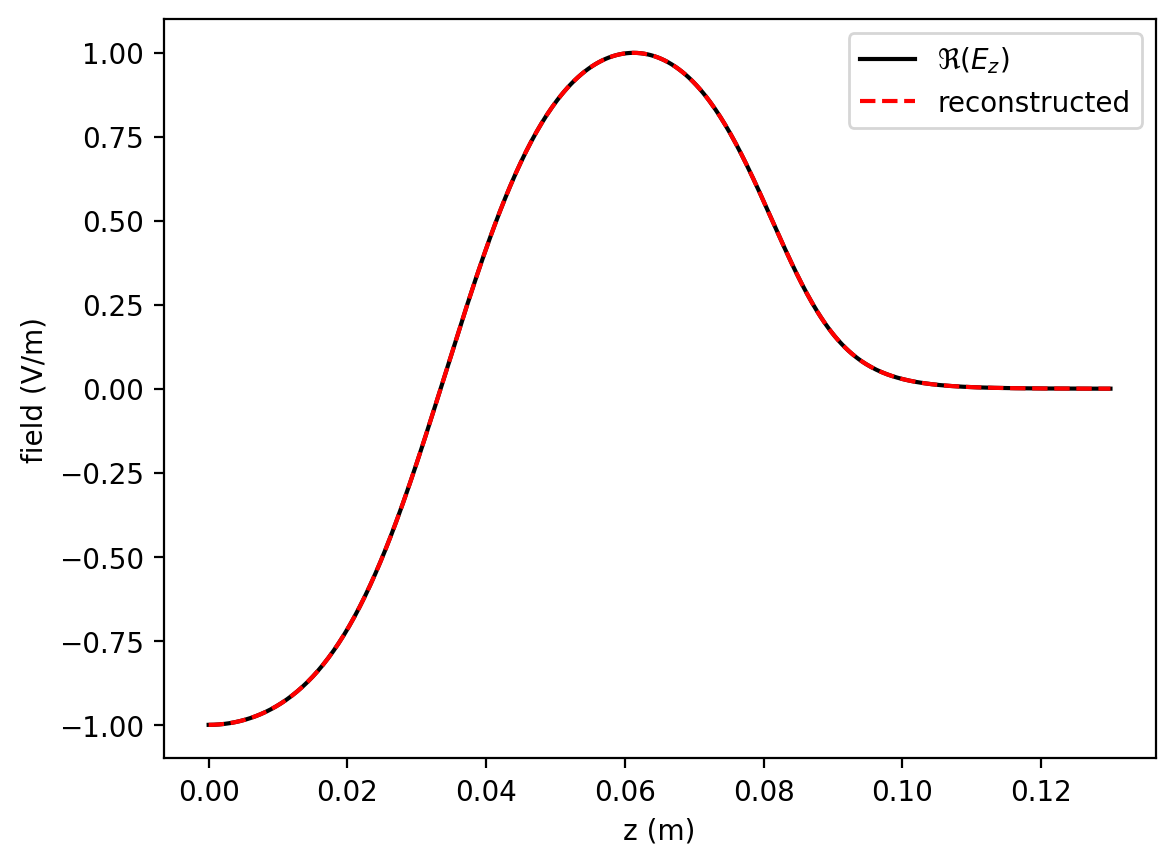

In [28]:
from pmd_beamphysics.interfaces.impact import field_reconsruction
L = z0.ptp()
zlist = np.linspace(0, L, len(Ez0))
reconstructed_Ez0 = np.array([field_reconsruction(z, dat['Ez_fcoefs'], z0=-L, zlen = 2*L) for z in zlist])

plt.plot(z0, Ez0, label=r'$\Re \left( E_z\right)$', color='black')
plt.plot(zlist, reconstructed_Ez0, '--',  label='reconstructed', color='red', )
plt.ylabel('field (V/m)')
plt.xlabel('z (m)')
plt.legend()

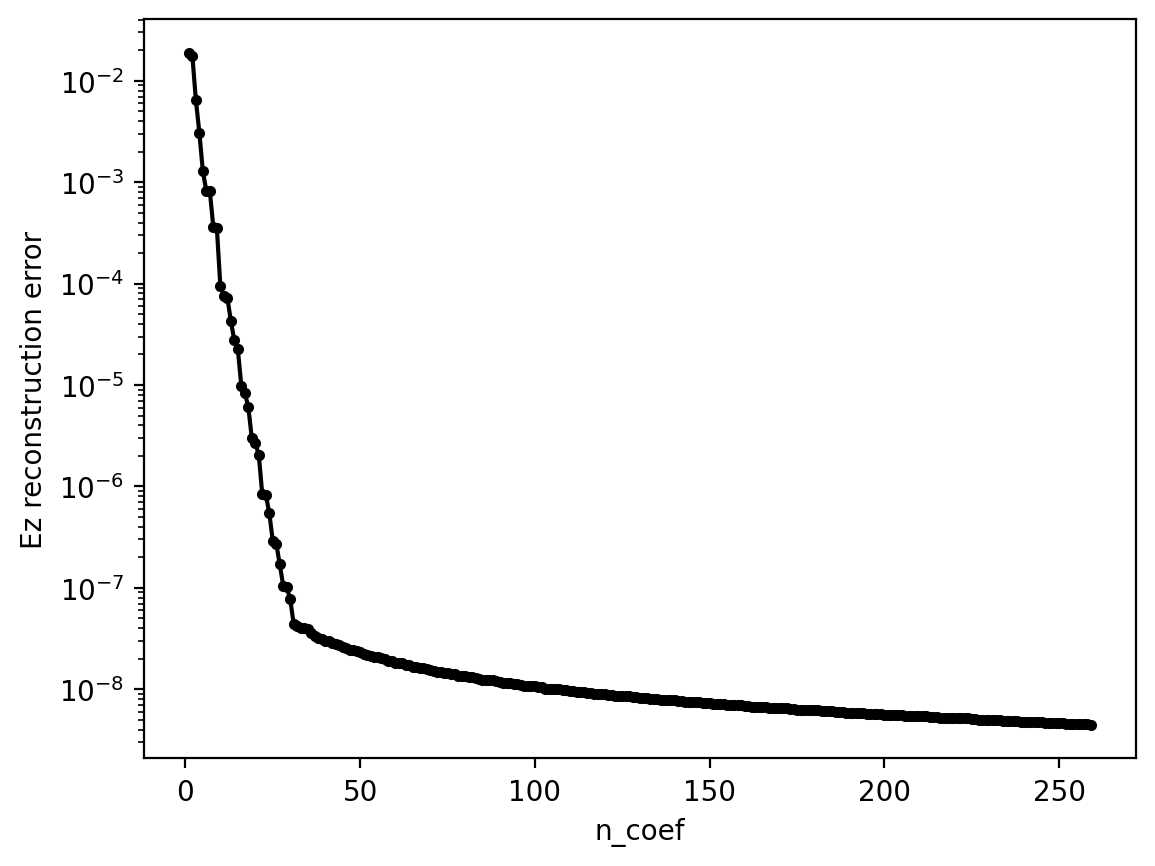

In [29]:
# This function can also be used to study the reconstruction error as a function of the number of coefficients
ncoefs = np.arange(1, FM2.shape[2]//2)
errs = np.array([FM2.write_impact_solrf(n_coef = n, err_calc=True, zmirror=True)['Ez_err'] for n in ncoefs])

fig, ax = plt.subplots()
ax.plot(ncoefs, errs, marker='.', color='black')
ax.set_xlabel('n_coef')
ax.set_ylabel('Ez reconstruction error')
ax.set_yscale('log')

## Write GPT

In [30]:
#FM.write_gpt('solenoid.gdf', asci2gdf_bin='$ASCI2GDF_BIN', verbose=True)
FM.write_gpt('rfgun_for_gpt.txt', verbose=True)

ASCII field data written. Convert to GDF using: asci2df -o field.gdf rfgun_for_gpt.txt


'rfgun_for_gpt.txt'

In [31]:
FM.write_superfish('rfgun2.t7')

'rfgun2.t7'

# Read Superfish

Proper Superfish T7 can also be read.

In [32]:
FM3 = FieldMesh.from_superfish('rfgun2.t7')
FM3

<FieldMesh with cylindrical geometry and (61, 1, 521) shape at 0x1564544c0>

In [33]:
# Note that writing the ASCII and conversions alter the data slightly
FM == FM3

False

In [34]:
# But the data are all close
for c in FM.components:
    close = np.allclose(FM.components[c], FM3.components[c])
    equal = np.all(FM.components[c] == FM3.components[c])
    print(c, equal, close)

electricField/z False True
electricField/r False True
magneticField/theta False True


## Fieldmap creation from 1D

In [35]:
#from pmd_beamphysics.field_expansion import expand_1d_static_fieldmap, expand_1d_dynamic_fieldmap
# TODO


In [36]:
# Cleanup
import os
for file in ('rfgun_for_gpt.txt',
             'rfdata99',
             'rfgun2.h5',
             'rfgun2.t7'):
    os.remove(file)
